In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [57]:
training_set=pd.read_csv('BTC-USD.csv')  
training_set1=training_set.iloc[:,1:2]        #selecting the second column
print(training_set1.head())                   #print first five rows
#training_set1=training_set1.values            #converting to 2d array

      Open
0  0.04951
1  0.04951
2  0.08584
3  0.08080
4  0.07474


In [58]:
training_set1.values

array([[4.95100000e-02],
       [4.95100000e-02],
       [8.58400000e-02],
       ...,
       [7.70125000e+03],
       [7.59377978e+03],
       [8.25925977e+03]])

In [59]:
#Scaling the data
sc = MinMaxScaler()                           #scaling using normalisation 
training_set1 = sc.fit_transform(training_set1)
xtrain=training_set1[0:2694]               #input values of rows [0-2694
ytrain=training_set1[1:2695]               #input values of rows [1-2695]
xtrain = np.reshape(xtrain, (2694, 1, 1))     #Reshaping into required shape for Keras

In [60]:
#importing keras and its packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [80]:
regressor=Sequential()                                                      #initialize the RNN

regressor.add(LSTM(units=10,activation='sigmoid',input_shape=(None,1)))      #adding input layerand the LSTM layer 
regressor.add(Dense(units=1))                                               #adding output layers
regressor.compile(optimizer='adam',loss='mean_squared_error')               #compiling the RNN

regressor.fit(xtrain,ytrain,batch_size=32,epochs=20)                      #fitting the RNN to the training set  


Epoch 1/20
2694/2694 [==============================] - 2s 586us/step - loss: 0.1385
Epoch 2/20
2694/2694 [==============================] - 0s 99us/step - loss: 0.0197
Epoch 3/20
2694/2694 [==============================] - 0s 104us/step - loss: 0.0047
Epoch 4/20
2694/2694 [==============================] - 0s 99us/step - loss: 0.0038
Epoch 5/20
2694/2694 [==============================] - 0s 99us/step - loss: 0.0036
Epoch 6/20
2694/2694 [==============================] - 0s 104us/step - loss: 0.0034
Epoch 7/20
2694/2694 [==============================] - 0s 99us/step - loss: 0.0032
Epoch 8/20
2694/2694 [==============================] - 0s 145us/step - loss: 0.0029
Epoch 9/20
2694/2694 [==============================] - 0s 104us/step - loss: 0.0028
Epoch 10/20
2694/2694 [==============================] - 0s 104us/step - loss: 0.0026
Epoch 11/20
2694/2694 [==============================] - 0s 104us/step - loss: 0.0024
Epoch 12/20
2694/2694 [==============================] - 0s 128us/s

In [81]:
# Reading CSV file into test set
test_set = pd.read_csv('BTC-USD.csv')
test_set.head()
real_stock_price = test_set.iloc[:,1:2]      #selecting the second column
real_stock_price = real_stock_price.values      #converting to 2D array

In [82]:
real_stock_price

array([[4.95100000e-02],
       [4.95100000e-02],
       [8.58400000e-02],
       ...,
       [7.70125000e+03],
       [7.59377978e+03],
       [8.25925977e+03]])

In [83]:
#getting the predicted BTC value of the first week of Dec 2017  
inputs = real_stock_price			
#inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (2765, 1, 1))
predicted_stock_price = regressor.predict(inputs)
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(real_stock_price[0:100],predicted_stock_price[0:100])

ValueError: continuous is not supported

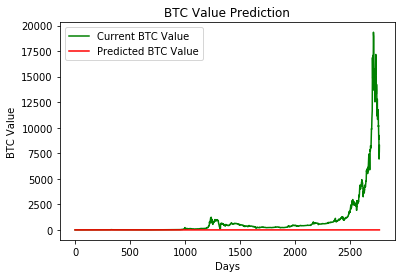

In [86]:
plt.plot(real_stock_price, color = 'green', label = 'Current BTC Value')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted BTC Value')
plt.title('BTC Value Prediction')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
plt.show()